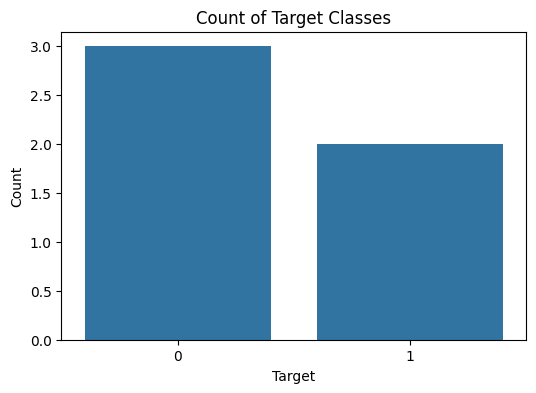

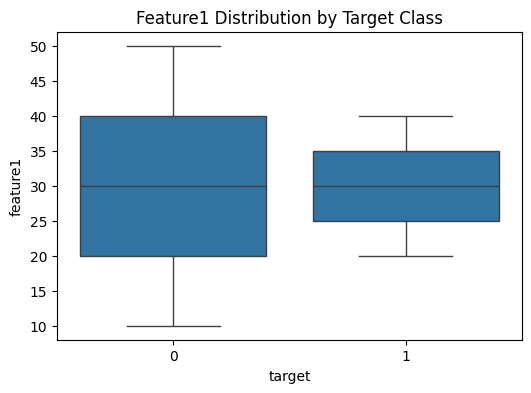

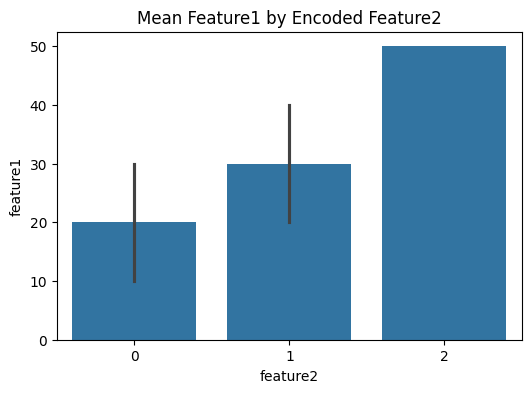

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:51:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

Validation Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



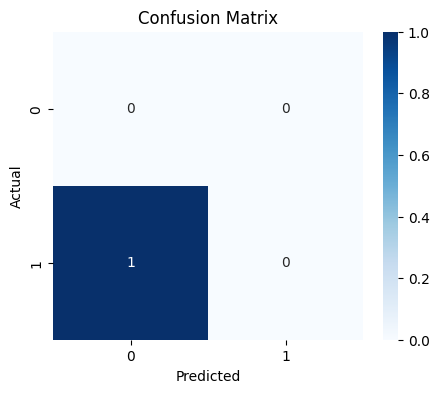


Predictions on Test Set:
   id  target
0   6       0
1   7       0
2   8       0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

le = LabelEncoder()
train_df['feature2'] = le.fit_transform(train_df['feature2'])
test_df['feature2'] = le.transform(test_df['feature2'])


plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_df)
plt.title('Count of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='feature1', data=train_df)
plt.title('Feature1 Distribution by Target Class')
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(x='feature2', y='feature1', data=train_df)
plt.title('Mean Feature1 by Encoded Feature2')
plt.show()

X = train_df[['feature1', 'feature2']]
y = train_df['target']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))


print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


test_X = test_df[['feature1', 'feature2']]
test_predictions = model.predict(test_X)


output = pd.DataFrame({'id': test_df['id'], 'target': test_predictions})
print("\nPredictions on Test Set:")
print(output)